<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/assignments/05_Mar_AssQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1.** How can you create a Bokeh plot using Python code?

Bokeh is a python library used for data visualization. This library used html and java script library for rendering plots which makes graphs much more interective.

In [ ]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

In [ ]:
# sample example

from bokeh.plotting import figure, output_file, show

output_file('test.html')
countries = ['India',"Pakistan",'Bangladesh','Japan']
population = [142,23,17,12]

graph = figure(title = "Population Chart",x_range=countries,height=350)
graph.vbar(x=countries, top=population, width=0.9)
show(graph)

**Q2.** What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

**glyphs**

glyphs are nothong but different geometrical representations for representing data like line, circle etc.

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# making a circle plot
output_file('test.html')
p = figure(title='Demo Graph of bill vs tips')
p.xaxis.axis_label = 'total_bill'
p.yaxis.axis_label = 'tip'
p.circle(tips['total_bill'],tips['tip'])
show(p)

**Q3.** How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

Below is a example of customizing the chart which we created in last question

In [ ]:
output_file('test.html')
p = figure(title='Demo Graph of bill vs tips')
p.xaxis.axis_label = 'total_bill'
p.yaxis.axis_label = 'tip'
p.circle(tips['total_bill'],tips['tip'],legend_label='billing points',fill_color='orange',size=10)
show(p)

**Q4.** What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
real time?

**Bokeh server**

Bokeh serer is a tool available inside bokeh library which can be used to create realtime interective dashboards. This is written using flask web server so its basically a web server which can provide a consistent connection between browser events and python objects on server. With this, if a python object gets updated on server side, same is pushed to user browser.

In [22]:
#code available here.
#https://github.com/beercafeguy/bokeh-server-app

import numpy as np
from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput,Div,Spinner
from bokeh.plotting import figure

N = 200
x = np.linspace(0, 4 * np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(title="sine wave")
line = plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)

div = Div(text="<p>Select Size</p>")
spinner = Spinner(title="Line Width",low=0,high=20,step=1,value=int(line.glyph.line_width),width=200)
spinner.js_link("value",line.glyph,"line_width")

textinput = TextInput(value=line.glyph.line_color,width=200)
textinput.js_link("value",line.glyph,"line_color")

def update_data(attrname, old, new):
    a = 1
    b = 0
    w = 0
    k = freq.value
    x = np.linspace(0, 4 * np.pi, N)
    y = a * np.sin(k * x + w) + b
    source.data = dict(x=x, y=y)


freq.on_change('value', update_data)
curdoc().add_root(row(freq,spinner,textinput, plot, width=500))
curdoc().title = "Sliders, Selectors and text box"

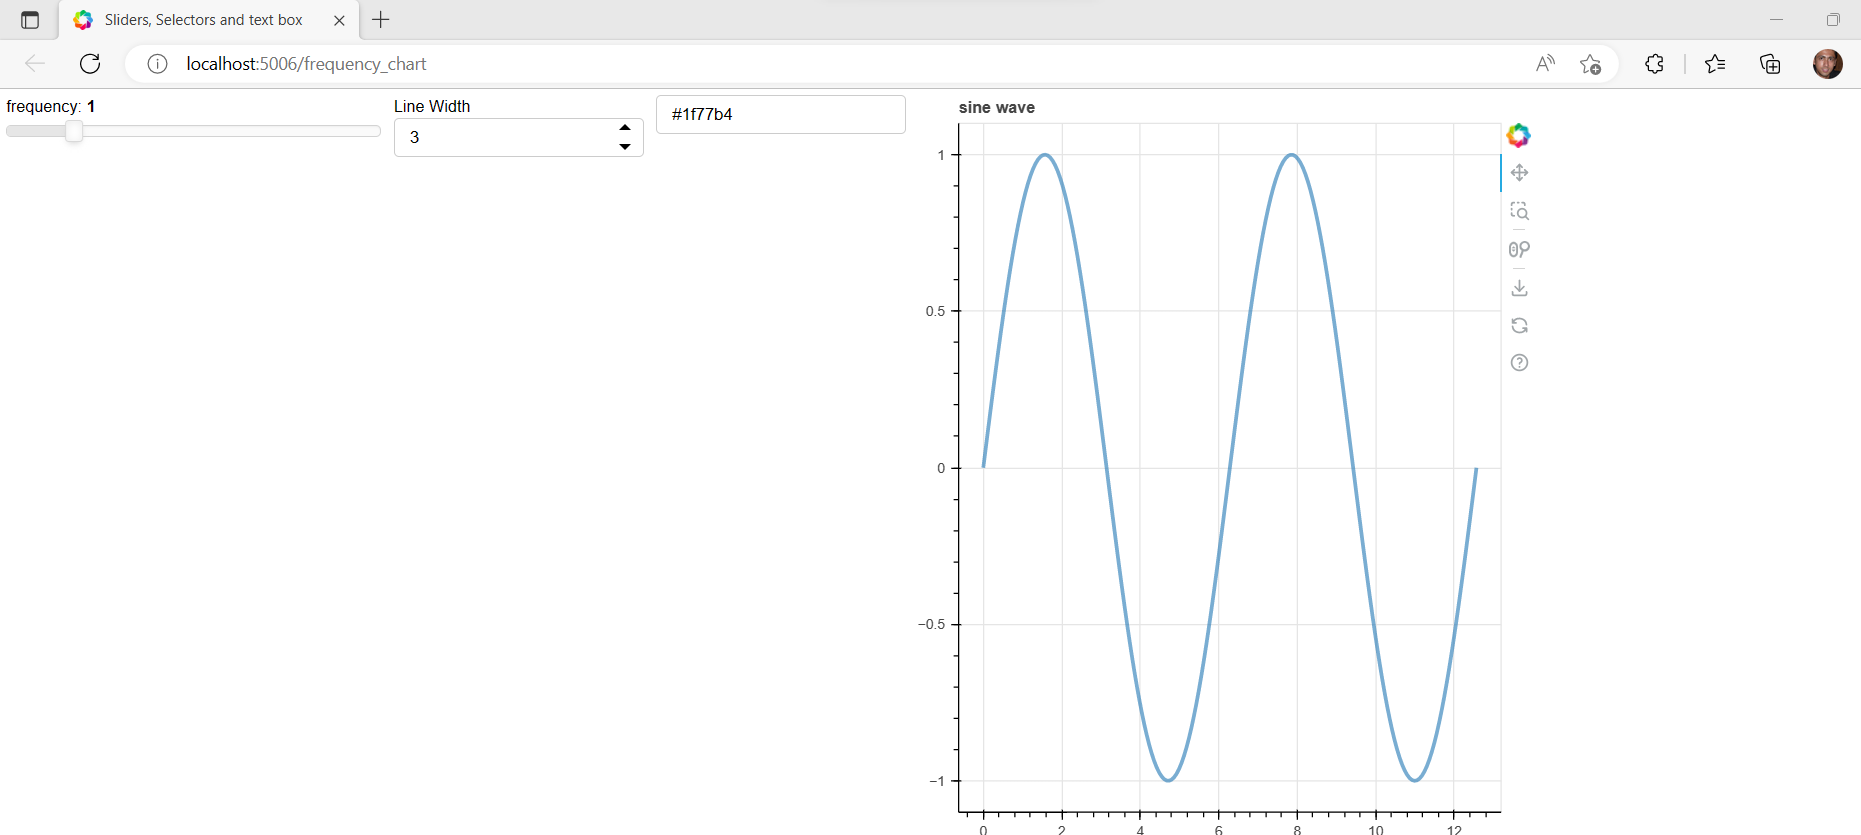

**Q5.** How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [ ]:
# ans available in below git repo
# https://github.com/beercafeguy/bokeh-server-app
# screenshot below

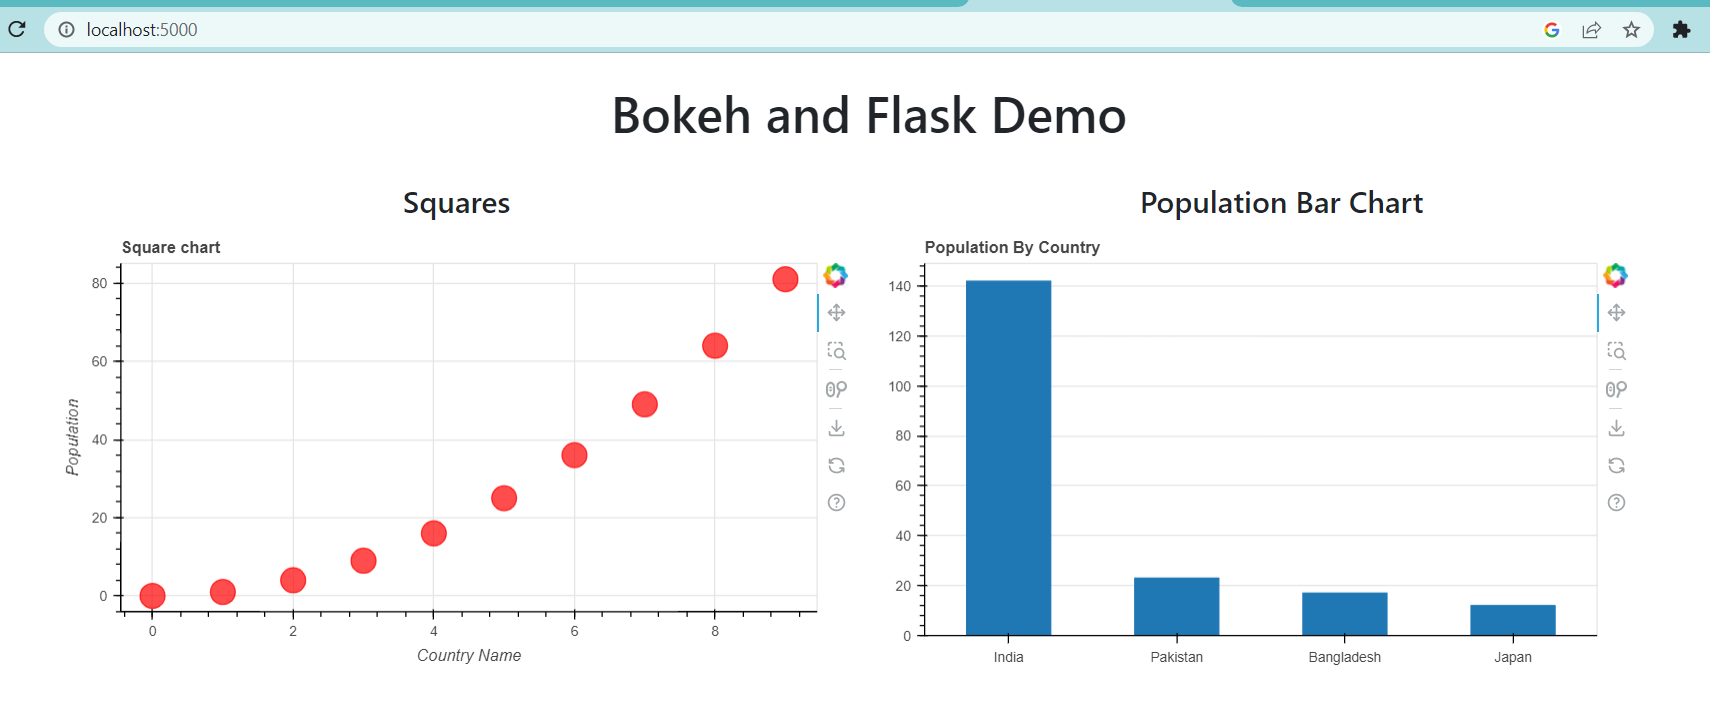